<a href="https://colab.research.google.com/github/2403A52058/NLP_LABASSIGNMENTS/blob/main/NLP_LAB_05_2403A52058.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [1]:
"""
 Import required libraries for NLP processing,
data handling, and visualization.
"""

import pandas as pd
import spacy
from spacy.matcher import Matcher
from collections import Counter
import matplotlib.pyplot as plt


Load spaCy English Model

In [3]:
"""
 Load spaCy English language model.
Used for tokenization, POS tagging, NER, and noun chunks.
"""

nlp = spacy.load("en_core_web_sm")


Load arXiv Dataset

In [5]:
"""
 Load the arXiv abstract dataset.
Make sure the CSV file is available in the working directory.
"""

df = pd.read_csv("/content/arxiv_data.csv")

# Display first few rows
df.head()


,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


Select Subject Area

In [7]:
import pandas as pd
import spacy
from spacy.matcher import Matcher
from collections import Counter
import matplotlib.pyplot as plt




"""
 Filter dataset by subject category (optional).
Example: Computer Science related abstracts.
"""

# Check available categories
df['terms'].value_counts().head()

# Filter CS-related abstracts
cs_df = df[df['terms'].str.contains("cs", na=False)]

print("Number of CS abstracts:", len(cs_df))

Number of CS abstracts: 51523


Text Preprocessing Function

In [10]:
"""
 Define a text preprocessing function.
Removes extra spaces and converts text to lowercase.
"""

def preprocess_text(text):
    """
    Preprocess input text by:
    - Converting to lowercase
    - Removing extra whitespace

    Args:
        text (str): Raw abstract text

    Returns:
        str: Cleaned text
    """
    return " ".join(text.lower().split())


Apply spaCy Pipeline

In [13]:
import pandas as pd
import spacy
from spacy.matcher import Matcher
from collections import Counter
import matplotlib.pyplot as plt




"""
 Apply spaCy NLP pipeline to abstracts.
"""

# Take a small sample for faster processing
texts = cs_df['summaries'].dropna().head(100).apply(preprocess_text)

docs = [nlp(text) for text in texts]

Extract Frequent Noun Phrases

In [14]:
"""
 Extract noun phrases from processed documents.
"""

noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text)

# Count frequency
np_freq = Counter(noun_phrases)

# Display top 10 noun phrases
np_freq.most_common(10)


[('we', 265),
 ('which', 74),
 ('that', 74),
 ('it', 72),
 ('the-art', 42),
 ('this paper', 39),
 ('medical image segmentation', 32),
 ('our method', 28),
 ('this work', 27),
 ('image segmentation', 24)]

Visualize Top Noun Phrases

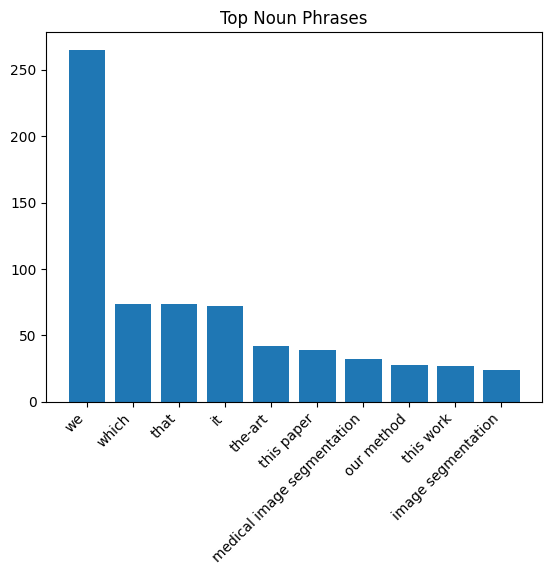

In [16]:
"""
 Visualize top noun phrases using a bar chart.
"""

top_np = np_freq.most_common(10)
labels, values = zip(*top_np)

plt.figure()
plt.bar(labels, values)
plt.xticks(rotation=45, ha='right')
plt.title("Top Noun Phrases")
plt.show()


Named Entity Recognition

In [17]:
"""
 Extract named entities from abstracts.
"""

entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

entity_freq = Counter([ent[1] for ent in entities])
entity_freq


Counter({'CARDINAL': 162,
         'DATE': 16,
         'NORP': 1,
         'ORDINAL': 37,
         'GPE': 4,
         'ORG': 24,
         'PERCENT': 19,
         'MONEY': 3,
         'PERSON': 10,
         'TIME': 2,
         'QUANTITY': 1})

Visualize Entity Frequencies

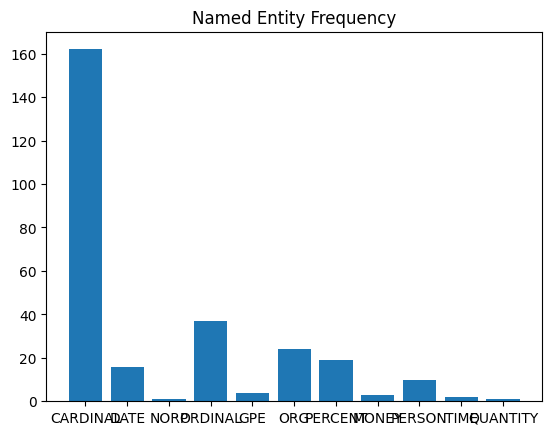

In [18]:
"""
 Visualize named entity frequency.
"""

labels = list(entity_freq.keys())
values = list(entity_freq.values())

plt.figure()
plt.bar(labels, values)
plt.title("Named Entity Frequency")
plt.show()


Rule-Based Matching Using spaCy Matcher

In [20]:
"""
 Use spaCy Matcher to identify technical term patterns.
Pattern example: Adjective + Noun (e.g., 'neural network')
"""

matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "ADJ"},
    {"POS": "NOUN"}
]

matcher.add("TECH_TERM", [pattern])


Extract Technical Terms Using Matcher

In [21]:
"""
Extract technical terms using matcher rules.
"""

technical_terms = []

for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        technical_terms.append(doc[start:end].text)

Counter(technical_terms).most_common(10)


[('medical image', 70),
 ('semantic segmentation', 33),
 ('deep learning', 24),
 ('contextual information', 14),
 ('unlabeled data', 13),
 ('neural networks', 13),
 ('medical imaging', 11),
 ('neural network', 11),
 ('medical images', 11),
 ('semantic image', 11)]